# Patient Experience Analysis

In this analysis we look at de-identified patient experience data. The data is collected from patients that have finished their four week program with Nicoe. There are three columns where the patients detail what was the best parts of the experience for them, the worst parts, and any suggestions they have.

# Importing tools

The patient experience pipeline is a set of functions created specifically for analyzing the texts from the patient experience data set. Beside that, we will use the datetime library, numpy, and pandas for more basic functions within this report. 

In [1]:
#import main tools we will most likely use

import patientexperiencepipeline as pepl

import datetime
import numpy as np
import pandas as pd

2022-06-27 09:23:02 INFO: Downloading default packages for language: en (English)...
2022-06-27 09:23:03 INFO: File exists: /Users/humdanahmed/stanza_resources/en/default.zip
2022-06-27 09:23:05 INFO: Finished downloading models and saved to /Users/humdanahmed/stanza_resources.


2022-06-27 09:23:06 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-06-27 09:23:06 INFO: Use device: cpu
2022-06-27 09:23:06 INFO: Loading: tokenize
2022-06-27 09:23:06 INFO: Loading: pos
2022-06-27 09:23:06 INFO: Loading: lemma
2022-06-27 09:23:06 INFO: Loading: depparse
2022-06-27 09:23:07 INFO: Loading: sentiment
2022-06-27 09:23:07 INFO: Loading: constituency
2022-06-27 09:23:07 INFO: Loading: ner
2022-06-27 09:23:08 INFO: Done loading processors!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/humdanahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load and inspect data

In [28]:
df = pepl.load_data('patient_experience.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         113 non-null    datetime64[ns]
 1   Best Part    109 non-null    object        
 2   Worst Part   102 non-null    object        
 3   Suggestions  102 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.7+ KB


We are missing values for some entries but for the most part the data is filled out.

In [6]:
df['Date'].describe(datetime_is_numeric=True)

count                              113
mean     2021-09-13 13:45:33.458336256
min         2021-04-01 10:00:21.740000
25%      2021-07-07 14:27:44.023000064
50%         2021-09-02 13:18:03.180000
75%      2021-11-24 12:29:56.163000064
max         2022-03-03 14:20:32.390000
Name: Date, dtype: object

The data in the file that was read in ranges from April of 2021 to March of 2022.

In [13]:
df.head()

,Date,Best Part,Worst Part,Suggestions
0,2022-03-03 14:20:32.390,"The holistic approach to better health, especi...",Not enough time for the team intake to cover 2...,Get an endocrinologist on staff and work with ...
1,2022-03-03 14:18:19.340,The feeling that medical providers were invest...,Medical system at home units don't function li...,No. Thank you all for what you do.
2,2022-02-24 14:27:46.387,The broad spectrum of education we received du...,Discussed in NiCoE debrief.,Discussed in NiCoE debrief.
3,2022-02-24 14:27:36.840,The staff all felt like they cared deeply abou...,Nothing.,Have the schedules posted electronically via t...
4,2022-02-24 14:21:44.773,the attention that was directed towards me.,would have liked to really have done a bottom ...,scheduling better


# Basic word frequencies

In [12]:
bestlemma = pepl.sbl(df, df['Best Part'])
bestcounts = pepl.word_list(bestlemma)
bestcounts.head(10)

,Frequency,Word
46,24,art
47,22,therapy
11,20,care
17,19,staff
1,14,approach
8,12,provider
34,11,team
23,9,help
88,8,part
145,8,issue


Just from a basic frequency distribution, we can get an idea that the patients are mentioning the "art", "therapy", and staff interactions within their best parts of their experience.

In [10]:
worstlemma = pepl.sbl(df, df['Worst Part'])
worstcounts = pepl.word_list(worstlemma)
worstcounts.head(10)

Add a suffix to the wordfreqsSUFFIX.csv file. Your suffix will fit where the capitalized word "SUFFIX" is in wordfreqsSUFFIX.csv worst


,Frequency,Word
36,13,feel
1,12,time
57,9,schedule
133,9,think
95,9,week
100,7,appointment
113,7,none
117,6,experience
134,6,bad
360,6,stay


With the worst parts of the patients' expeiences, there is a general trend relating to time with words like "schedule", "week," appointment", and "stay" coming up more frequently. 

In [11]:
suggestionslemma = pepl.sbl(df, df['Suggestions'])
suggcounts = pepl.word_list(suggestionslemma)
suggcounts.head(10)

Add a suffix to the wordfreqsSUFFIX.csv file. Your suffix will fit where the capitalized word "SUFFIX" is in wordfreqsSUFFIX.csv suggs


,Frequency,Word
11,21,schedule
19,18,day
55,15,patient
71,14,program
9,14,nicoe
81,12,week
100,10,class
103,9,time
123,8,care
95,8,experience


The common words in the suggestions seem to follow the trend of the worst parts in relating to time. We are only looking at the top 10 words in each of these frequency distributions but one can easily look deeper which we will do later in this report. 

# LDA Topic Analysis

### Best Parts

In [ ]:
pepl.LDApipe(df)

### Worst Parts

In [ ]:

pepl.LDApipe(df)

### Suggestions

In [ ]:
pepl.LDApipe(df)

# Time Series Analysis

## Import tools

In [4]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings 
warnings.filterwarnings('ignore')

## Set date/time as index

In [7]:
tsdf = df
tsdf.sort_values(by='Date', ascending=True, inplace=True)
tsdf.head()

,Date,Best Part,Worst Part,Suggestions
112,2021-04-01 10:00:21.740,The extensive testing during the first week to...,Feeling rushed between appointments when class...,There is a class with Allison that identified ...
111,2021-04-01 13:16:19.970,I loved the nurses both were so awesome. The a...,Lack of time to process between appts.,"Pack all of the classes into one day, give the..."
110,2021-04-01 13:18:48.970,Great staff,None,None
109,2021-04-14 18:42:35.553,A tailored approach for the individual,None,More discussion on alcohol use
108,2021-04-14 19:41:07.540,The collection of experts from various fields ...,There was not one single negative aspect to my...,I felt the Chaplains two blocks of instruction...


## Count the responses per month

In [96]:
# How many people are doing the survey each month?

monthlypatients = tsdf.set_index('Date').resample('M').count()

monthlypatients.head(15)

,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score,Time,Day,ntimeint
Date,,,,,,,,,,
2021-04-30,11,11,11,11,11,11,11,11,11,11
2021-05-31,7,7,7,7,7,7,7,7,7,7
2021-06-30,7,7,7,7,7,7,7,7,7,7
2021-07-31,15,15,15,15,15,15,15,15,15,15
2021-08-31,15,15,15,15,15,15,15,15,15,15
2021-09-30,12,12,12,12,12,12,12,12,12,12
2021-10-31,8,8,8,8,8,8,8,8,8,8
2021-11-30,13,13,13,13,13,13,13,13,13,13
2021-12-31,8,8,8,8,8,8,8,8,8,8


## Augmented Dickey Fuller Test

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure).
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.



In [43]:
result=adfuller(monthlypatients)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

NameError: name 'adfuller' is not defined

## Plot the count of responses by month

<AxesSubplot:title={'center':'Monthly responses'}, xlabel='Date'>

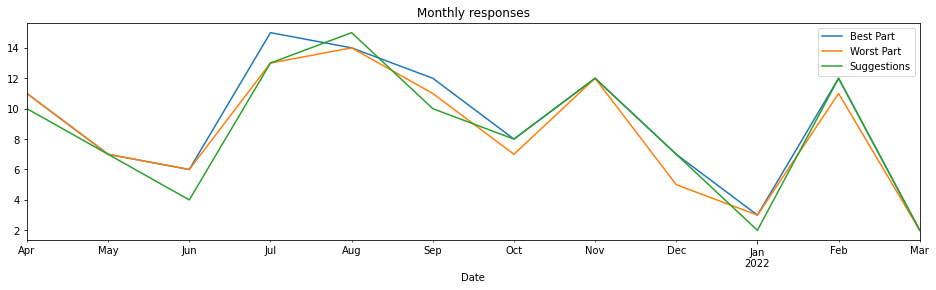

In [14]:
#monthly_patients = tsdf.resample('M').count()
monthlypatients.plot(figsize=(16, 4), title='Monthly responses')

## Viewing the number of responses by day

<AxesSubplot:title={'center':'Daily Responses'}, xlabel='Date'>

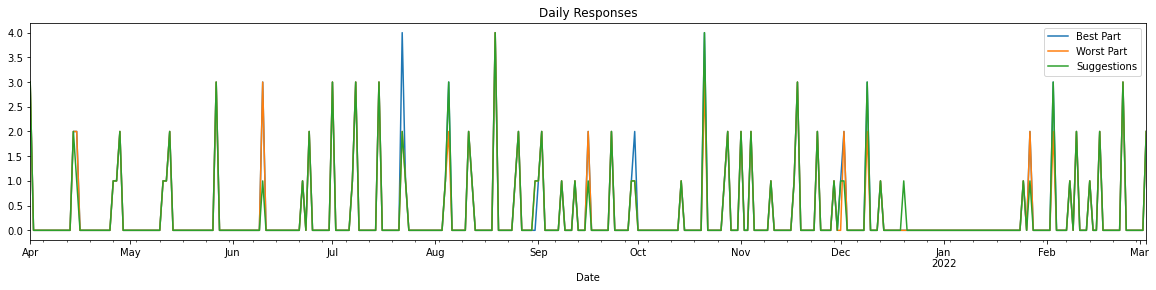

In [37]:
daily_patients = df.set_index('Date').resample('D').count()
daily_patients.plot(figsize=(20, 4), title='Daily Responses')

It may look as though there are days when there are more entries for worst parts than best parts but this is just the layering showing the suggestions line on top of the worst line on top of the best line.

## Incorporate Sentiment Analysis

### Add VADER sentiment scores to the dataframe

In [26]:
tsdf = pepl.clean_df(tsdf)
pepl.vader_df(tsdf)
tsdf.head()

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score,Time
112,2021-04-01 10:00:21.740,the extensive testing during the first week to...,feeling rushed between appointments when class...,there is a class with allison that identified ...,-0.2500,0.1280,0.2732,0.050400,10:00:21.740000
111,2021-04-01 13:16:19.970,i loved the nurses both were so awesome. the a...,lack of time to process between appts.,"pack all of the classes into one day, give the...",0.9365,-0.3182,0.0000,0.206100,13:16:19.970000
110,2021-04-01 13:18:48.970,great staff,none,none,0.6249,0.0000,0.0000,0.208300,13:18:48.970000
109,2021-04-14 18:42:35.553,a tailored approach for the individual,none,more discussion on alcohol use,0.0000,0.0000,0.0000,0.000000,18:42:35.553000
108,2021-04-14 19:41:07.540,the collection of experts from various fields ...,there was not one single negative aspect to my...,i felt the chaplains two blocks of instruction...,0.4404,0.4585,0.4666,0.455167,19:41:07.540000


## Plot the sentiment scores by week

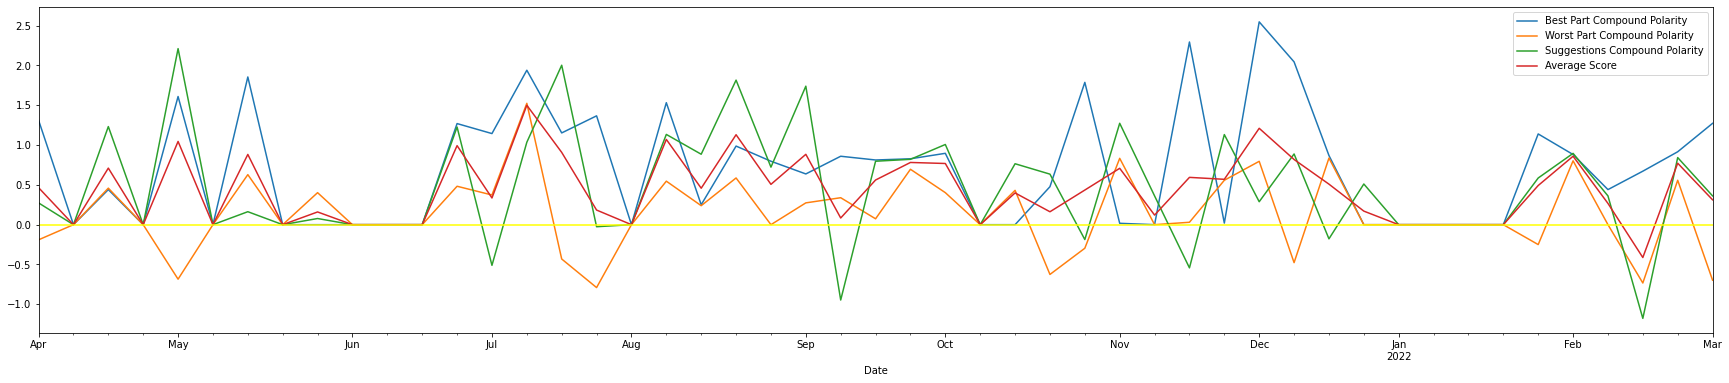

In [95]:
# output the timeline for sentiment scores of the best parts, worst parts, and suggestions.

weeklypolarity = tsdf.set_index('Date').resample('W').sum()
weeklypolarity['Best Part Compound Polarity'].plot(kind='line', figsize=(30,6), legend=True)
weeklypolarity['Worst Part Compound Polarity'].plot(kind='line', figsize=(30,6), legend=True)
weeklypolarity['Suggestions Compound Polarity'].plot(kind='line', figsize=(30,6), legend=True)
weeklypolarity['Average Score'].plot(kind='line', figsize=(30,6), legend=True).axhline(y=0, c='yellow')


## View polarity scores by time of day.

In [10]:
tsdf['Time'] = tsdf['Date'].dt.time

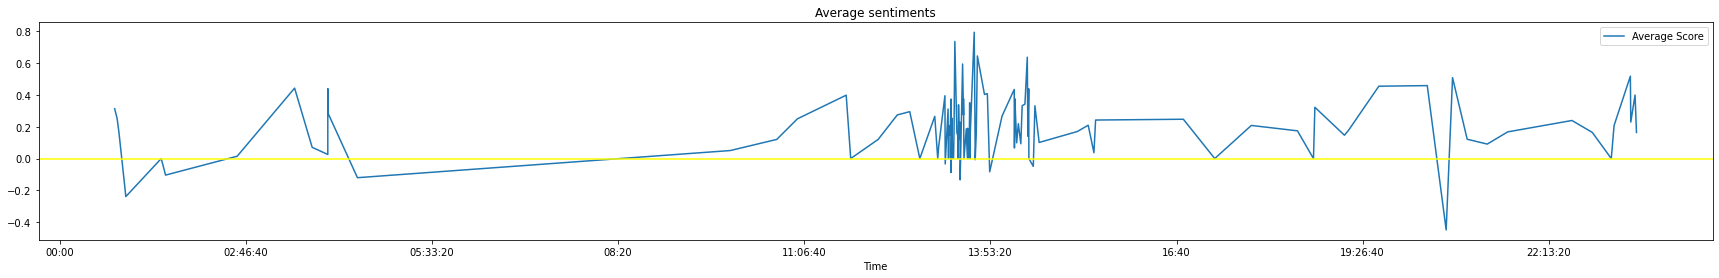

In [80]:
#Average Score
tsdf.plot( x='Time', y='Average Score', kind='line', figsize=(30,4), title='Average sentiments').axhline(y=0, c='yellow')

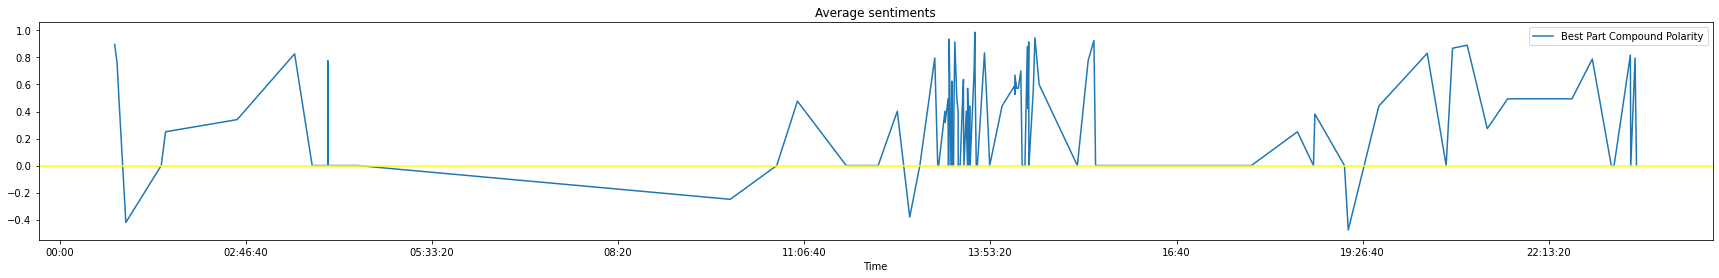

In [15]:
# Best Part Scores
tsdf.plot( x='Time', y='Best Part Compound Polarity', kind='line', figsize=(30,4), title='Average sentiments').axhline(y=0, c='yellow')

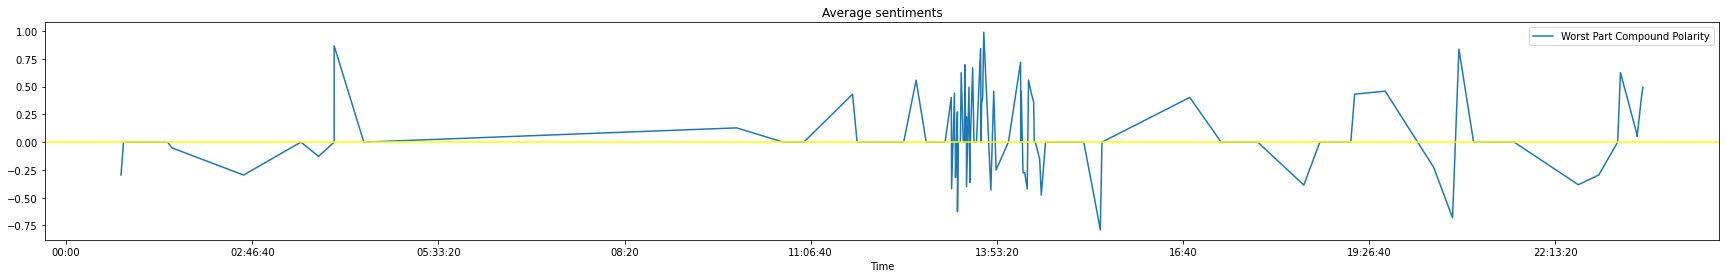

In [16]:
# Worst Part Scores
tsdf.plot( x='Time', y='Worst Part Compound Polarity', kind='line', figsize=(30,4), title='Average sentiments').axhline(y=0, c='yellow')

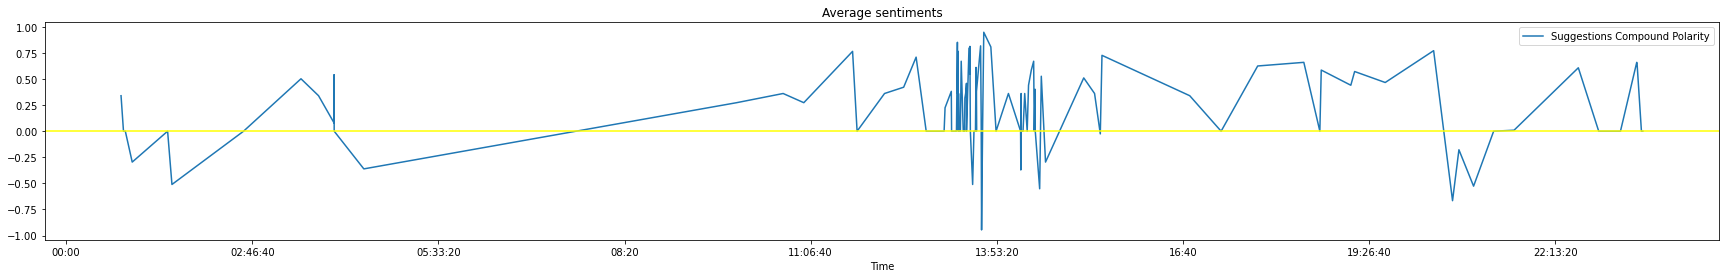

In [17]:
# Suggestion Scores
tsdf.plot( x='Time', y='Suggestions Compound Polarity', kind='line', figsize=(30,4), title='Average sentiments').axhline(y=0, c='yellow')

It is interesting to see the lines follow the nature of the column it is produced from. The best parts mostly stay above the 0, the worst parts line is sitting lower below the 0, and the suggestions are somewhere inbetween which is what one would expect.

# Viewing data by order of polarity 

## View the worst parts in ascending order of polarity (worst to best).

In [44]:
pd.set_option('display.width', None) # Stop our outputs from being truncated
pd.set_option('display.max_colwidth', None)

worstsorting = tsdf.sort_values(by = 'Worst Part Compound Polarity' , ascending=True)
worstsorting.head(15)

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score,Time
73,2021-07-23 15:26:00.093,"the vast number and quality of objective exams to identify deficiencies on the diagnosis side, the explanation of those results by each doc, and the communication between docs to fully assess each patient. art therapy was surprisingly awesome on the restorative side. the cohort was also really solid and i appreciated the cohesion and support that group structure offered.","i did not feel that my psychiatrist (not neuropsych, not family therapist) adequately or accurately assessed my state. i felt unwelcome, as if i was not the type of person she wanted to meet with. she listened sufficiently to quote my words back to me but without empathy or understanding. i felt accused and categorized, rather than heard and understood. i didnt feel that the weight of the challenges i faced was taken seriously by my psychiatrist because i was not able to distill those challenges into a simple sentence or two that would fall neatly into the categories of depression, anxiety, or ptsd lanes. it felt as though she was not at all interested in identifying issues in a way that would lead to bettering my health as a patient, just in figuring out which category i fit into.","1) perhaps set expectations in the behavioral health lane, recognizing that the focus is on identifying cases of/issues with anxiety, depression, and/or ptsd that could impact tbi recovery, rather than a more extensive psychiatric assessment (for more complex issues that would also impact tbi recovery) due to the limited time available. 2) the phone call(s) to family member(s) should be done in the first week to hear any insights they may have and help the nicoe care team understand the challenges the service member is experiencing from the familys perspective.",0.9259,-0.7898,-0.0258,0.036767,15:26:00.093000
7,2022-02-14 20:41:24.357,the team approach to medicine and treating all concerns from different treatment modalities methods,"my conversation with the wr neuro surgeon who asked me what is was there to see him about. his complete lack of knowledge on any of my history was insulting. the neuro exam he gave me was awful, i have seen second year dive school students perform better exams",the need to have daily pt sessions with the trainer for at least an hour a day targeting the areas that are creating the most pain and discomfort.,0.0000,-0.6808,-0.6659,-0.448900,20:41:24.357000
41,2021-10-21 13:18:06.537,art therapy and the talks that came from that time,i dont know that there is a worst.,no. thank you all for what you do,0.0000,-0.6249,0.3612,-0.087900,13:18:06.537000
104,2021-04-27 15:20:52.263,the team in general was excellent. in particular lisa and barbara were incredibly helpful for me.,navy lodge and fischer house were not great. i’d prefer to stay in a hotel so we don’t have to switch sleep locations midway through the course.,i’d recommend a brief upfront with nicoe’s approach to addressing patients’ issues. there seemed to be an underlining assumption that we knew the strategy.,0.7778,-0.5096,0.3612,0.209800,15:20:52.263000
19,2021-12-09 14:33:10.203,"there were so many wonderful parts. i am extremely grateful to everyone who works to make this place a magical place of deep healing. the empathy and care of each provider, therapist, expert, and staff member stands out. for the program, i thought the most effective part was that nicoe treated my body as a whole entity, and also treated my mind and soul/spirit/wellness. the whole of this treatment, is much greater than the sum of the parts.",i was disappointed that i could not attend the optional mindfulness practices because other appointments had been booked at the same time.,"i understand that nicoe is operating within covid-19 restrictions. i would encourage nicoe to explore ways to support child care, child involvement. i also wish that my sp

Key ideas here: A feeling of miscommunication around seeing certain specialists (neuro surgeon, psychiatrist) and having , issues with staying at the navy lodge and fisher house and having to switch mid program. 

## View the best parts in descending order of polarity (best to worst)

In [42]:
bestsorting = tsdf.sort_values(by = 'Best Part Compound Polarity' , ascending=False)
bestsorting.head()

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score
64,2021-08-19 13:39:20.250,"i truly cant say enough here. the cohesive team experience. i felt like all providers were on the same sheet of music. haveing every specilty to dive deep with me in all lanes of heeling, wellness, and recovery. i especially enjoyed talking to brother david and dr. panettiere about spirituality. they both really helped fill my ""hope tank"" which was pretty low. molly was great and seemed like the glue keeping everything together for me, love her. dr. fuller dialing in the meds. dr. brooks going above and beyond to get me appts not related to tbi but to improve my overall heath. all the staff, and the corpsman. the corpsman were noticeably kind and very nice to deal with. very different from the hospital. great job to them.",really digging here to find anything. and cant....,"yes, providing all the teaching/knowledge material. either electronically via disk or usb either on day one or end of course. or printing all material out in a separate binder for day 1. either way, this is very important to have. i feel anxious about leaving here and trusting my notes and memory. we do have handouts for some classes but i would say 30% missing. i will drive back here from va beach to pick up a hard copy if needed. that is how important this is to me.",0.9868,0.0000,0.1397,0.375500
19,2021-12-09 14:33:10.203,"there were so many wonderful parts. i am extremely grateful to everyone who works to make this place a magical place of deep healing. the empathy and care of each provider, therapist, expert, and staff member stands out. for the program, i thought the most effective part was that nicoe treated my body as a whole entity, and also treated my mind and soul/spirit/wellness. the whole of this treatment, is much greater than the sum of the parts.",i was disappointed that i could not attend the optional mindfulness practices because other appointments had been booked at the same time.,"i understand that nicoe is operating within covid-19 restrictions. i would encourage nicoe to explore ways to support child care, child involvement. i also wish that my spouse could have had 1-2 one on one sessions with a family therapist, there is a lot of pain, frustration and grief there as well, specifically related to what they have had to put up with.",0.9465,-0.4767,0.5267,0.332167
111,2021-04-01 13:16:19.970,"i loved the nurses both were so awesome. the art, music, and meditation were the best.",lack of time to process between appts.,"pack all of the classes into one day, give the balance out day one.",0.9365,-0.3182,0.0000,0.206100
73,2021-07-23 15:26:00.093,"the vast number and quality of objective exams to identify deficiencies on the diagnosis side, the explanation of those results by each doc, and the communication between docs to fully assess each patient. art therapy was surprisingly awesome on the restorative side. the cohort was also really solid and i appreciated the cohesion and support that group structure offered.","i did not feel that my psychiatrist (not neuropsych, not family therapist) adequately or accurately assessed my state. i felt unwelcome, as if i was not the type of person she wanted to meet with. she listened sufficiently to quote my words back to me but without empathy or understanding. i felt accused and categorized, rather than heard and understood. i didnt feel that the weight of the challenges i faced was taken seriously by my psychiatrist because i was not able to distill those challenges into a simple sentence or two that would fall neatly into the categories of depression, anxiety, or ptsd lanes. it felt as though she was not at all interested in identifying issues in a way that would lead to bettering my health as a patient, just in figuring out which category i fit into.","1) perhaps set expectations in the behavioral health lane, recognizing that the

## View the Suggestion in descending order of polarity

In [44]:
bestsorting = tsdf.sort_values(by = 'Suggestions Compound Polarity' , ascending=False)
bestsorting.head()

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score
63,2021-08-19 13:41:39.397,"mindfulness, art/music therapy, behavioral health, tailored/adaptable consults (in my case, with cardio, derm, and ortho based on different concerns that came out of my blood panel).","i felt some of the group classes were a bit slow, redundant, and maybe a tad drier than they could have been. it all seemed like important subject matter, but i think the delivery could be improved. perhaps consider seeking feedback on individual modules based on specific metrics. for example, i think some group classes lent themselves more to using power point than did others. recommend being thoughtful about this in the future; in some cases a round table discussion w/ the facilitator or clinician sitting at the table with us and speaking openly about a particular subject (i.e. moira maguires session on ""relationships an intimacy"") is a better, more personal, more effective, and more engaging delivery method. there are other sessions that could similarly benefit from this approach i think. i realize its a bit non-traditional, and education usually occurs with the teacher in front of the classe using a board of some sort imparting wisdom to the students. but these arent your typical teachers or students, nor is the subject matter typical.","yes. it seems very important to me to ensure all of the resources distributed to the iop patients during the course of the 4 weeks should be aggregated in one of several ways so that it isnt lost or misplaced and is easily indexed and accessed for future reference. one way would be to burn all of the handouts, ppt briefs, links to additional resources, videos, etc to a disc that is given to each iop patient either at the beginning or at the end of the program. a second option would be to develop either a portal page or a website of some sort with the appropriate permissions/restrictions, and issue a user name and password or logon credentials to each graduate such that they can access and/or download the information if theyd like to do so. a third, lower tech suggestion would be to print out the handouts/ppt briefs that everyone will see during the course of the 4 weeks and put a copy of it in each of the binders given to the arrivin nicoe students so they have it for easy reference in an organized, indexed manner. and there are likely other better solutions beyond these that i havent though of...but the point is that this is the one area, the only area actually, where nicoe came across as surprisingly disorganized and slightly retro in its execution. everything else was absolutely top-notch.",0.0000,0.9883,0.9482,0.645500
56,2021-09-02 13:18:03.180,"tbi class, cognitive strategies, art therapy",music therapy was a little difficult to feel comfortable with the session.,"culinary therapy, creating an application for schedules, pictures and bios of all nicoe staff, research opportunitys, all lessons, handouts, get well plan schedule for self care, other useful information, base map etc. receive a user name and log in that stays with you when you leave so you can always review techniques, classes, live stream yoga, and a messenger to reach out to nicoe staff.",0.0000,0.2716,0.8519,0.374500
69,2021-08-05 13:38:48.717,the holistic approach. the entire facility and staff was incredible. nicoe is truly a safe space.,"sleep studies are a pain in the butt, but julius made the best one ive had yet and the information gained was the most thorough.","i think its pretty well dialed in. the right length, the right care.",0.7239,0.8422,0.8176,0.794567
80,2021-07-15 13:29:14.263,understanding bandwidth and learning techniques to increase it and manage things that take it away,having to go to the main hospital for appointments.,improve your scheduling process so you can maximize all the amazing assets organic to nicoe.,0.3182,0.0000,0.8126,0.376933
78,2021-0

## View the Suggestion in ascending order of polarity

In [43]:
bestsorting = tsdf.sort_values(by = 'Suggestions Compound Polarity' , ascending=True)
bestsorting.head()

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score
53,2021-09-12 13:39:41.647,staff members were amazing and the amount of appointments we were able to complete in such a short time period was unrivaled anywhere else.,"i think some members tend to get a little sucked into the research and dont always give us the results based on what were experiencing. some of the briefs were way too ""in-the-weeds"" for what we need at our level, though i appreciate giving us the option for receiving it.","have more flexibility in letting people pick/choose what they want to do after the second week. for example, art, music, and mindfulness therapy...these are all excellent, but we tend to gravitate towards one over the others after a few weeks. there is no need for additional follow-ups if weve selected that we dont need it anymore. i would much rather get more information on what the hell is going on with me from the doctors than to keep being forced to paint a mask, especially if while im painting im still in pain.",0.5859,0.3384,-0.9460,-0.007233
7,2022-02-14 20:41:24.357,the team approach to medicine and treating all concerns from different treatment modalities methods,"my conversation with the wr neuro surgeon who asked me what is was there to see him about. his complete lack of knowledge on any of my history was insulting. the neuro exam he gave me was awful, i have seen second year dive school students perform better exams",the need to have daily pt sessions with the trainer for at least an hour a day targeting the areas that are creating the most pain and discomfort.,0.0000,-0.6808,-0.6659,-0.448900
29,2021-11-18 14:31:42.660,the immediate attention to any issue you have until there is a solution or path to the solution.,"sleep study for me, how i know it was necessary and happy i did it it was just really uncomfortable, and trying to figure out the cpap was not easy for me","not really as i feel like my worst experience is related to me, not sure how many other people have the same issue.",0.5574,-0.1528,-0.5517,-0.049033
40,2021-10-27 21:00:14.597,the attention from the staff was amazing. i felt like they genuinely wanted to help resolve the issues that brought you to nicoe.,the repeated filling out of questionnaires that seemed to be the same; at least pre-nicoe and within the first week.,"giving patients a better understanding of what nicoe considers mild-moderate-severe in all areas; pt, pain, anxiety, depression, etc.",0.8910,0.0000,-0.5267,0.121433
85,2021-07-01 13:31:41.867,learning new ways to help with my issues (mind-body),"not finding a solutions for my back and headaches. however, i do have a couple of ""hopeful"" treatments that may help.","have attendees home medical facility conduct a ""once over"" that covers all of the labs, identification of areas of pain, etc. so nicoe can can have more time for the recovery/discovery of treatments.",0.4019,0.6686,-0.5106,0.186633


# View the results by the length of the text, from the longest to shortest, for each column.

## View the best parts in descending order of length.

In [46]:
df.sort_values(by="Best Part", key=lambda x: x.str.len(), ascending=False).head()

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score
64,2021-08-19 13:39:20.250,"i truly cant say enough here. the cohesive team experience. i felt like all providers were on the same sheet of music. haveing every specilty to dive deep with me in all lanes of heeling, wellness, and recovery. i especially enjoyed talking to brother david and dr. panettiere about spirituality. they both really helped fill my ""hope tank"" which was pretty low. molly was great and seemed like the glue keeping everything together for me, love her. dr. fuller dialing in the meds. dr. brooks going above and beyond to get me appts not related to tbi but to improve my overall heath. all the staff, and the corpsman. the corpsman were noticeably kind and very nice to deal with. very different from the hospital. great job to them.",really digging here to find anything. and cant....,"yes, providing all the teaching/knowledge material. either electronically via disk or usb either on day one or end of course. or printing all material out in a separate binder for day 1. either way, this is very important to have. i feel anxious about leaving here and trusting my notes and memory. we do have handouts for some classes but i would say 30% missing. i will drive back here from va beach to pick up a hard copy if needed. that is how important this is to me.",0.9868,0.0000,0.1397,0.375500
19,2021-12-09 14:33:10.203,"there were so many wonderful parts. i am extremely grateful to everyone who works to make this place a magical place of deep healing. the empathy and care of each provider, therapist, expert, and staff member stands out. for the program, i thought the most effective part was that nicoe treated my body as a whole entity, and also treated my mind and soul/spirit/wellness. the whole of this treatment, is much greater than the sum of the parts.",i was disappointed that i could not attend the optional mindfulness practices because other appointments had been booked at the same time.,"i understand that nicoe is operating within covid-19 restrictions. i would encourage nicoe to explore ways to support child care, child involvement. i also wish that my spouse could have had 1-2 one on one sessions with a family therapist, there is a lot of pain, frustration and grief there as well, specifically related to what they have had to put up with.",0.9465,-0.4767,0.5267,0.332167
73,2021-07-23 15:26:00.093,"the vast number and quality of objective exams to identify deficiencies on the diagnosis side, the explanation of those results by each doc, and the communication between docs to fully assess each patient. art therapy was surprisingly awesome on the restorative side. the cohort was also really solid and i appreciated the cohesion and support that group structure offered.","i did not feel that my psychiatrist (not neuropsych, not family therapist) adequately or accurately assessed my state. i felt unwelcome, as if i was not the type of person she wanted to meet with. she listened sufficiently to quote my words back to me but without empathy or understanding. i felt accused and categorized, rather than heard and understood. i didnt feel that the weight of the challenges i faced was taken seriously by my psychiatrist because i was not able to distill those challenges into a simple sentence or two that would fall neatly into the categories of depression, anxiety, or ptsd lanes. it felt as though she was not at all interested in identifying issues in a way that would lead to bettering my health as a patient, just in figuring out which category i fit into.","1) perhaps set expectations in the behavioral health lane, recognizing that the focus is on identifying cases of/issues with anxiety, depression, and/or ptsd that could impact tbi recovery, rather than a more extensive psychiatric assessment (for more complex issues that would also impact tbi recovery) due to the limited time availabl

## View the worst parts in descending order of length.

In [47]:
df.sort_values(by="Worst Part", key=lambda x: x.str.len(), ascending=False).head()

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score
63,2021-08-19 13:41:39.397,"mindfulness, art/music therapy, behavioral health, tailored/adaptable consults (in my case, with cardio, derm, and ortho based on different concerns that came out of my blood panel).","i felt some of the group classes were a bit slow, redundant, and maybe a tad drier than they could have been. it all seemed like important subject matter, but i think the delivery could be improved. perhaps consider seeking feedback on individual modules based on specific metrics. for example, i think some group classes lent themselves more to using power point than did others. recommend being thoughtful about this in the future; in some cases a round table discussion w/ the facilitator or clinician sitting at the table with us and speaking openly about a particular subject (i.e. moira maguires session on ""relationships an intimacy"") is a better, more personal, more effective, and more engaging delivery method. there are other sessions that could similarly benefit from this approach i think. i realize its a bit non-traditional, and education usually occurs with the teacher in front of the classe using a board of some sort imparting wisdom to the students. but these arent your typical teachers or students, nor is the subject matter typical.","yes. it seems very important to me to ensure all of the resources distributed to the iop patients during the course of the 4 weeks should be aggregated in one of several ways so that it isnt lost or misplaced and is easily indexed and accessed for future reference. one way would be to burn all of the handouts, ppt briefs, links to additional resources, videos, etc to a disc that is given to each iop patient either at the beginning or at the end of the program. a second option would be to develop either a portal page or a website of some sort with the appropriate permissions/restrictions, and issue a user name and password or logon credentials to each graduate such that they can access and/or download the information if theyd like to do so. a third, lower tech suggestion would be to print out the handouts/ppt briefs that everyone will see during the course of the 4 weeks and put a copy of it in each of the binders given to the arrivin nicoe students so they have it for easy reference in an organized, indexed manner. and there are likely other better solutions beyond these that i havent though of...but the point is that this is the one area, the only area actually, where nicoe came across as surprisingly disorganized and slightly retro in its execution. everything else was absolutely top-notch.",0.0000,0.9883,0.9482,0.645500
73,2021-07-23 15:26:00.093,"the vast number and quality of objective exams to identify deficiencies on the diagnosis side, the explanation of those results by each doc, and the communication between docs to fully assess each patient. art therapy was surprisingly awesome on the restorative side. the cohort was also really solid and i appreciated the cohesion and support that group structure offered.","i did not feel that my psychiatrist (not neuropsych, not family therapist) adequately or accurately assessed my state. i felt unwelcome, as if i was not the type of person she wanted to meet with. she listened sufficiently to quote my words back to me but without empathy or understanding. i felt accused and categorized, rather than heard and understood. i didnt feel that the weight of the challenges i faced was taken seriously by my psychiatrist because i was not able to distill those challenges into a simple sentence or two that would fall neatly into the categories of depression, anxiety, or ptsd lanes. it felt as though she was not at all interested in identifying issues in a way that would lead to bettering my health as a patient, just in figuring out which category i fit into.","1) perhaps set expectations in the behavior

## View the suggestions in descending order of length

In [49]:
df.sort_values(by="Suggestions", key=lambda x: x.str.len(), ascending=False).head()

,Date,Best Part,Worst Part,Suggestions,Best Part Compound Polarity,Worst Part Compound Polarity,Suggestions Compound Polarity,Average Score
63,2021-08-19 13:41:39.397,"mindfulness, art/music therapy, behavioral health, tailored/adaptable consults (in my case, with cardio, derm, and ortho based on different concerns that came out of my blood panel).","i felt some of the group classes were a bit slow, redundant, and maybe a tad drier than they could have been. it all seemed like important subject matter, but i think the delivery could be improved. perhaps consider seeking feedback on individual modules based on specific metrics. for example, i think some group classes lent themselves more to using power point than did others. recommend being thoughtful about this in the future; in some cases a round table discussion w/ the facilitator or clinician sitting at the table with us and speaking openly about a particular subject (i.e. moira maguires session on ""relationships an intimacy"") is a better, more personal, more effective, and more engaging delivery method. there are other sessions that could similarly benefit from this approach i think. i realize its a bit non-traditional, and education usually occurs with the teacher in front of the classe using a board of some sort imparting wisdom to the students. but these arent your typical teachers or students, nor is the subject matter typical.","yes. it seems very important to me to ensure all of the resources distributed to the iop patients during the course of the 4 weeks should be aggregated in one of several ways so that it isnt lost or misplaced and is easily indexed and accessed for future reference. one way would be to burn all of the handouts, ppt briefs, links to additional resources, videos, etc to a disc that is given to each iop patient either at the beginning or at the end of the program. a second option would be to develop either a portal page or a website of some sort with the appropriate permissions/restrictions, and issue a user name and password or logon credentials to each graduate such that they can access and/or download the information if theyd like to do so. a third, lower tech suggestion would be to print out the handouts/ppt briefs that everyone will see during the course of the 4 weeks and put a copy of it in each of the binders given to the arrivin nicoe students so they have it for easy reference in an organized, indexed manner. and there are likely other better solutions beyond these that i havent though of...but the point is that this is the one area, the only area actually, where nicoe came across as surprisingly disorganized and slightly retro in its execution. everything else was absolutely top-notch.",0.0000,0.9883,0.9482,0.645500
73,2021-07-23 15:26:00.093,"the vast number and quality of objective exams to identify deficiencies on the diagnosis side, the explanation of those results by each doc, and the communication between docs to fully assess each patient. art therapy was surprisingly awesome on the restorative side. the cohort was also really solid and i appreciated the cohesion and support that group structure offered.","i did not feel that my psychiatrist (not neuropsych, not family therapist) adequately or accurately assessed my state. i felt unwelcome, as if i was not the type of person she wanted to meet with. she listened sufficiently to quote my words back to me but without empathy or understanding. i felt accused and categorized, rather than heard and understood. i didnt feel that the weight of the challenges i faced was taken seriously by my psychiatrist because i was not able to distill those challenges into a simple sentence or two that would fall neatly into the categories of depression, anxiety, or ptsd lanes. it felt as though she was not at all interested in identifying issues in a way that would lead to bettering my health as a patient, just in figuring out which category i fit into.","1) perhaps set expectations in the behavior